In [13]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras

import numpy as np
from numpy import load
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Load dataset

In [14]:
np.random.seed(42)

n_steps = 50
series = load('univariate-time-series-1-step.npy')

X_train, y_train = series[:7000, :n_steps], series[:7000, -1] # -1 references the last column
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]


In [15]:
series.shape

(10000, 51, 1)

In [16]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

Saving figure time_series_plot


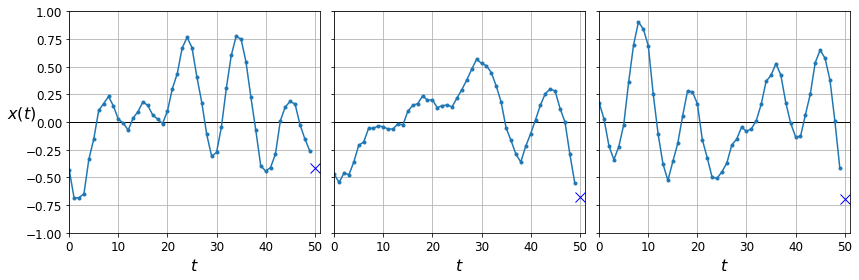

In [17]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
save_fig("time_series_plot")
plt.show()

Linear predictions:

In [18]:
np.random.seed(42)
tf.random.set_seed(42)

#Replace this with your RNN code

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 0s 1ms/step - loss: 0.1147 - val_loss: 0.0487
Epoch 2/20
219/219 [==============================] - 0s 674us/step - loss: 0.0387 - val_loss: 0.0253
Epoch 3/20
219/219 [==============================] - 0s 720us/step - loss: 0.0241 - val_loss: 0.0184
Epoch 4/20
219/219 [==============================] - 0s 692us/step - loss: 0.0190 - val_loss: 0.0154
Epoch 5/20
219/219 [==============================] - 0s 679us/step - loss: 0.0161 - val_loss: 0.0132
Epoch 6/20
219/219 [==============================] - 0s 665us/step - loss: 0.0139 - val_loss: 0.0117
Epoch 7/20
219/219 [==============================] - 0s 669us/step - loss: 0.0120 - val_loss: 0.0101
Epoch 8/20
219/219 [==============================] - 0s 697us/step - loss: 0.0104 - val_loss: 0.0090
Epoch 9/20
219/219 [==============================] - 0s 683us/step - loss: 0.0091 - val_loss: 0.0079
Epoch 10/20
219/219 [==============================] - 0s 669us/step - loss: 0.0081 

In [19]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 530us/step - loss: 0.0039


0.003911957610398531

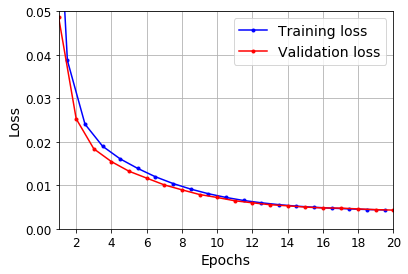

In [20]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

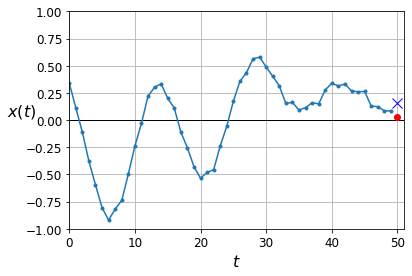

In [56]:
y_pred = model.predict(X_test)
plot_series(X_test[15, :, 0], y_test[15, 0], y_pred[15, 0])
plt.show()

In [58]:
y_pred[15, 0]

0.025370076

In [57]:
lstm_model = tf.keras.models.Sequential([

    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(24),
    tf.keras.layers.Dropout(0.2),

#     tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1)
])

In [46]:
lstm_model.compile(loss="mse", optimizer="adam")
history_lstm = lstm_model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 17s 76ms/step - loss: 0.0929 - val_loss: 0.0538
Epoch 2/20
219/219 [==============================] - 16s 72ms/step - loss: 0.0610 - val_loss: 0.0511
Epoch 3/20
219/219 [==============================] - 16s 73ms/step - loss: 0.0512 - val_loss: 0.0302
Epoch 4/20
219/219 [==============================] - 16s 73ms/step - loss: 0.0297 - val_loss: 0.0166
Epoch 5/20
219/219 [==============================] - 16s 73ms/step - loss: 0.0184 - val_loss: 0.0089
Epoch 6/20
219/219 [==============================] - 16s 73ms/step - loss: 0.0124 - val_loss: 0.0055
Epoch 7/20
219/219 [==============================] - 16s 73ms/step - loss: 0.0101 - val_loss: 0.0048
Epoch 8/20
219/219 [==============================] - 16s 73ms/step - loss: 0.0091 - val_loss: 0.0040
Epoch 9/20
219/219 [==============================] - 16s 73ms/step - loss: 0.0086 - val_loss: 0.0043
Epoch 10/20
219/219 [==============================] - 16s 74ms/step - loss: 0.007

In [47]:
lstm_model.evaluate(X_test, y_test)

32/32 [==============================] - 1s 19ms/step - loss: 0.0029


0.002933537121862173

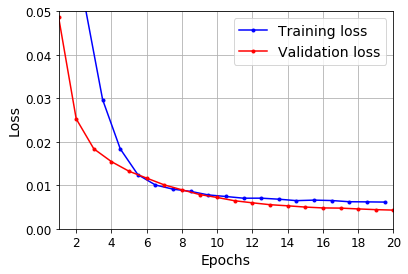

In [48]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history_lstm.history["loss"], history.history["val_loss"])
plt.show()

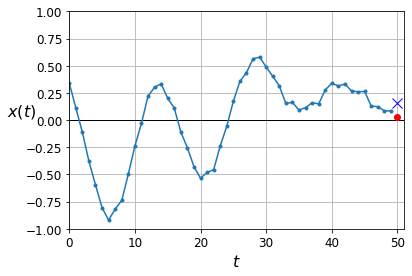

In [53]:
y_pred_lstm = model.predict(X_test)
plot_series(X_test[15, :, 0], y_test[15, 0],y_pred_lstm[15, 0])
plt.show()

In [55]:
y_pred_lstm[15, 0]

0.025370076